## Random Forest model

In [19]:
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("../data/preprocessed.csv")

In [ ]:
X = df.drop(columns=["risk_flag"], axis=1)
y = df["risk_flag"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [10]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_pred = rf.predict(X_test)

In [15]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[10162   279]
 [ 2513     3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     10441
           1       0.01      0.00      0.00      2516

    accuracy                           0.78     12957
   macro avg       0.41      0.49      0.44     12957
weighted avg       0.65      0.78      0.71     12957



In [18]:
# TN (10162) - loan was not approved, model correctly predicted this
# FP (279) - loan was not approved, model incorrectly predicted this
# FN (2513) - loan was approved but the model predicted as denied
# TP (3) - loan was approved, model correctly predicted this

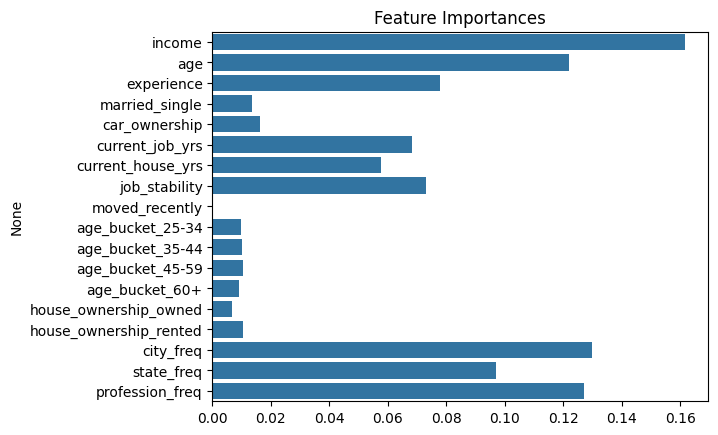

In [17]:
importances = rf.feature_importances_
feature_names = X.columns
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances")
plt.show()

In [21]:
joblib.dump(rf, "../models/rf_model.pkl")

['../models/rf_model.pkl']

In [22]:
pipeline = joblib.load("../models/rf_model.pkl")

In [23]:
pipeline

RandomForestClassifier(random_state=42)